In [63]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy as st
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('3campain.csv')
data

,Campain,Sell
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [39]:
data['Sell'].mean()

11.980952380952381

In [40]:
data.groupby('Campain').mean()

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


In [41]:
# ~
res = ols('Sell ~ Campain', data=data).fit()

In [42]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html
sm.stats.anova_lm(res)
# df = degree of freedom (3-1)
# Residual = 21 - 3 => 18
# f => fTest
# PR = pValue
# sum_sq = (sell - data['Sell'].mean()) ** 2 

,df,sum_sq,mean_sq,F,PR(>F)
Campain,2.0,3.606905,1.803452,0.821297,0.455683
Residual,18.0,39.525476,2.195860,NaN,NaN


In [43]:
data['Mean'] = data['Sell'].mean()

In [44]:
data

,Campain,Sell,Mean
0,A,12.6,11.980952
1,A,12.0,11.980952
2,A,11.8,11.980952
3,A,11.9,11.980952
4,A,13.0,11.980952
5,A,12.5,11.980952
6,A,14.0,11.980952
7,B,10.0,11.980952
8,B,10.2,11.980952
9,B,10.0,11.980952


In [45]:
sum_sq = sum((data['Sell'] - data['Mean']) ** 2)
sum_sq

43.132380952380956

In [46]:
gMean = data.groupby('Campain').mean()['Sell']
gMean # series

Campain
A    12.542857
B    11.533333
C    11.825000
Name: Sell, dtype: float64

In [47]:
gMean = data.groupby('Campain').mean()[['Sell']]
gMean # dataFrame

,Sell
Campain,
A,12.542857
B,11.533333
C,11.825000


In [48]:
gMean = gMean.rename(columns={'Sell': 'gMean'})
gMean

,gMean
Campain,
A,12.542857
B,11.533333
C,11.825000


In [49]:
data = data.merge(gMean, left_on='Campain', right_index=True)
data

,Campain,Sell,Mean,gMean
0,A,12.6,11.980952,12.542857
1,A,12.0,11.980952,12.542857
2,A,11.8,11.980952,12.542857
3,A,11.9,11.980952,12.542857
4,A,13.0,11.980952,12.542857
5,A,12.5,11.980952,12.542857
6,A,14.0,11.980952,12.542857
7,B,10.0,11.980952,11.533333
8,B,10.2,11.980952,11.533333
9,B,10.0,11.980952,11.533333


In [50]:
# Residual
ss_r = sum((data['Sell'] - data['gMean']) ** 2)
ss_r

39.52547619047619

In [51]:
# sum_sq explain = 3.606905
ss_e = sum((data['Mean'] - data['gMean']) ** 2)
ss_e

3.6069047619047634

In [52]:
# mean_sq = ss_e / df
ms_e = ss_e / 2
ms_e

1.8034523809523817

In [53]:
ms_r = ss_r / 18
ms_r

2.1958597883597886

In [54]:
# f
f = ms_e / ms_r
f

0.8212966923081559

In [61]:
# درجه آزادی اول 2 هست و درجه آزادی دوم 18 هست
# چونکه میخوایم احتمال شانسی بودن رو حساب کنیم پس منهی یک میکنیم
pValue = 1 - st.stats.f.cdf(f, 2, 18)
pValue

0.4556832940515234

In [62]:
d = st.stats.f.rvs(2, 18, size=10000)
d

array([0.92065413, 3.46749856, 2.39531508, ..., 0.17340794, 0.52894875,
       2.16509317])

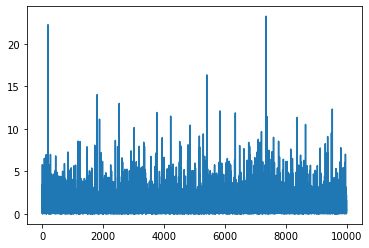

In [64]:
plt.plot(d)

(array([2.026e+03, 1.570e+03, 1.261e+03, 1.012e+03, 7.610e+02, 6.000e+02,
        4.780e+02, 4.320e+02, 3.160e+02, 2.580e+02, 2.340e+02, 1.520e+02,
        1.630e+02, 1.180e+02, 9.300e+01, 8.600e+01, 6.900e+01, 4.200e+01,
        4.400e+01, 4.100e+01, 4.100e+01, 3.100e+01, 2.100e+01, 1.800e+01,
        1.600e+01, 9.000e+00, 1.700e+01, 1.100e+01, 9.000e+00, 7.000e+00,
        7.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 8.000e+00, 1.000e+00,
        7.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

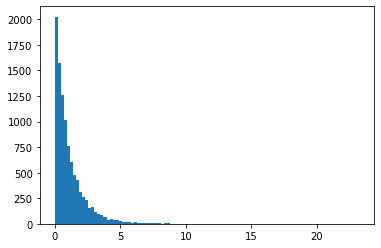

In [66]:
plt.hist(d, bins=100)